In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

filename = "owid-covid-data.csv"
df = pd.read_csv(filename)
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
df = df.dropna(subset=['location','date'])
df['date'] = pd.to_datetime(df['date'])
df = df[df['iso_code'].str.len() == 3]


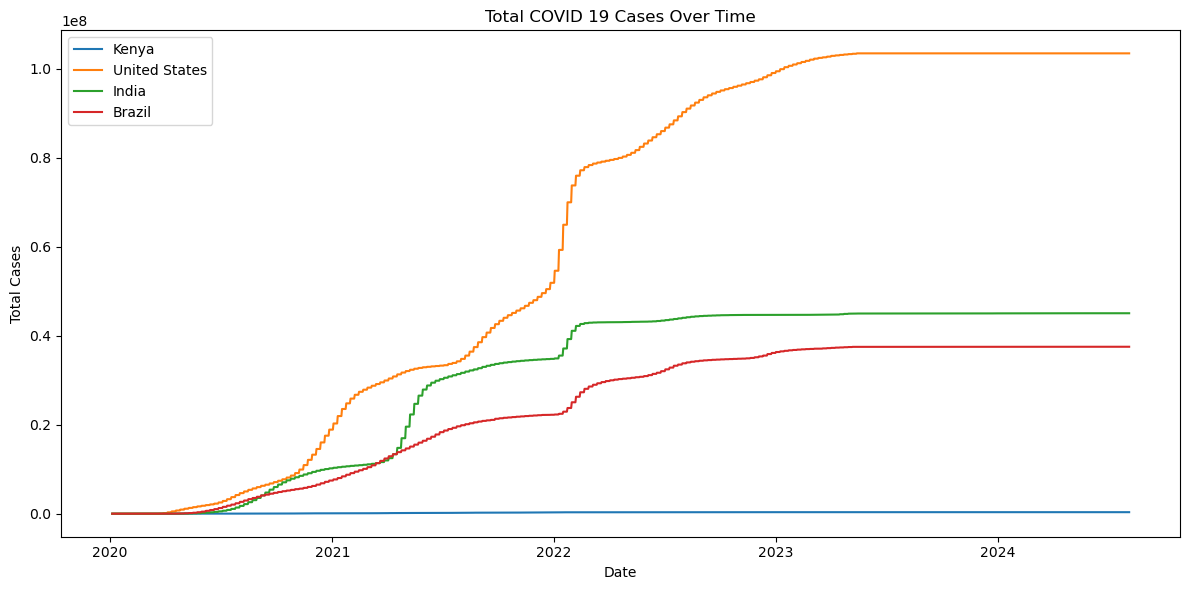

In [3]:
#Visualizations
#1.Total Cases Over Time
plt.figure(figsize=(12,6))
selected_countries = ['Kenya','United States','India','Brazil'] 
for country in selected_countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID 19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

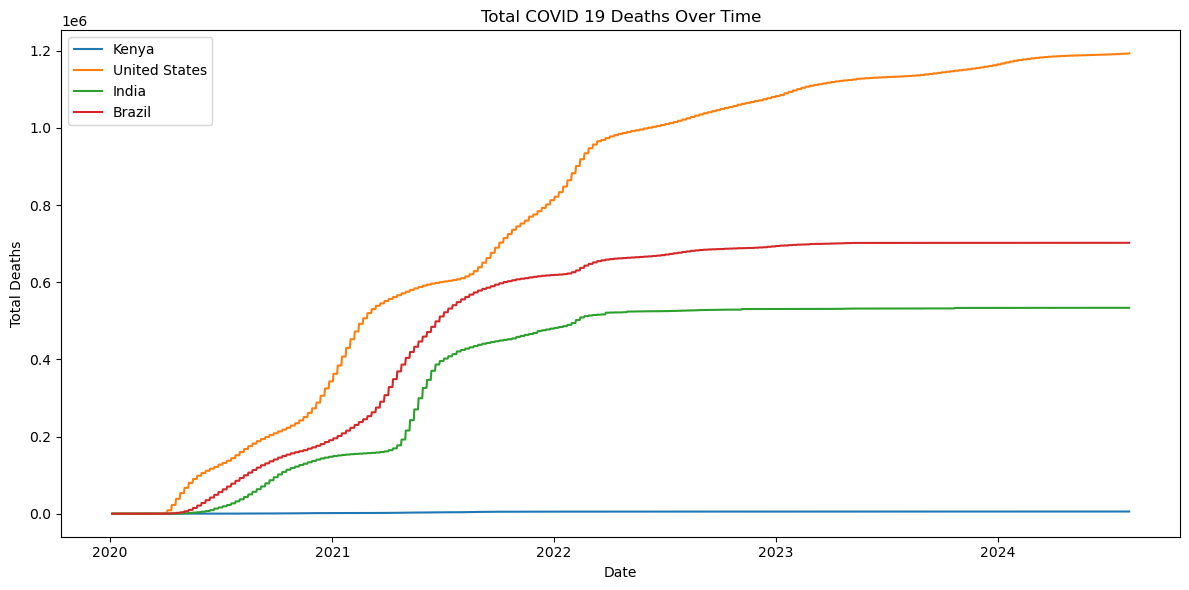

In [4]:
#2.Total Deaths Over Time
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data2 = df[df['location'] == country]
    plt.plot(country_data2['date'], country_data2['total_deaths'], label=country)
plt.title('Total COVID 19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

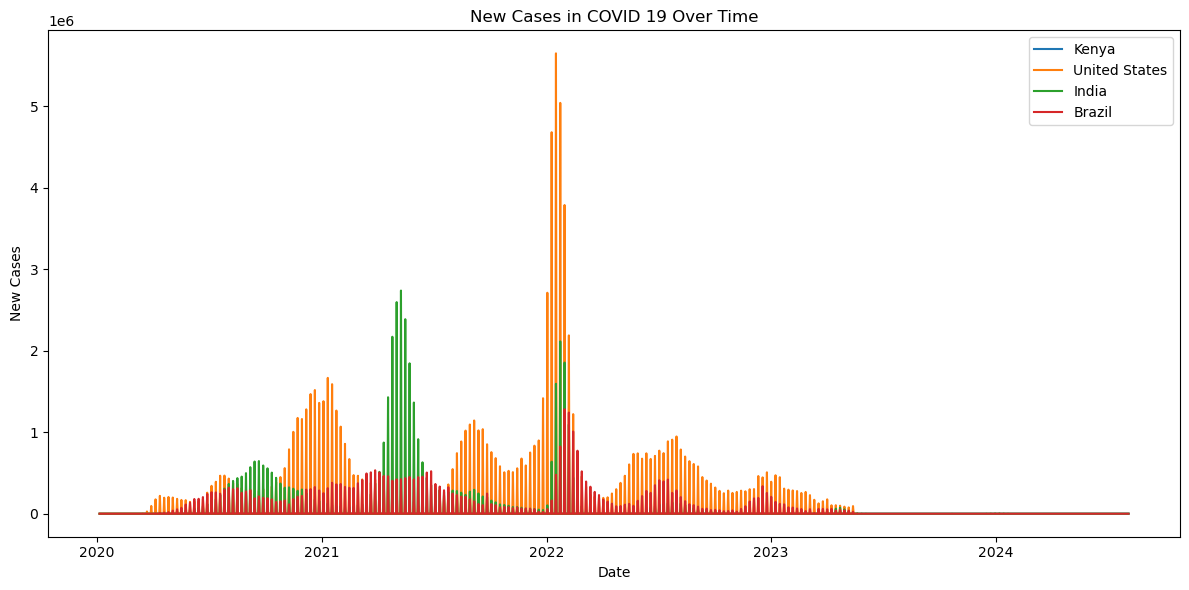

In [5]:
#3.New Cases
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data3 = df[df['location'] == country]
    plt.plot(country_data3['date'], country_data3['new_cases'], label=country)
plt.title('New Cases in COVID 19 Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

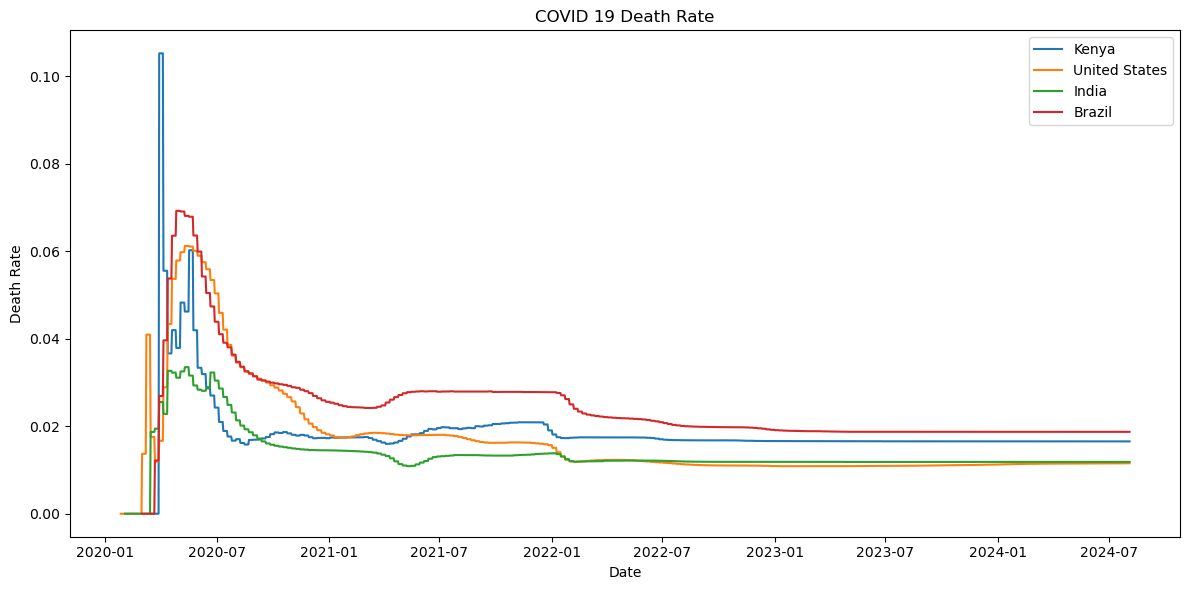

In [6]:
#4.Death Rates
plt.figure(figsize=(12,6))
df['death_rate'] = df['total_deaths'] / df['total_cases']
for country in selected_countries:
    country_data4 = df[df['location'] == country]
    plt.plot(country_data4['date'], country_data4['death_rate'], label=country)
plt.title('COVID 19 Death Rate')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

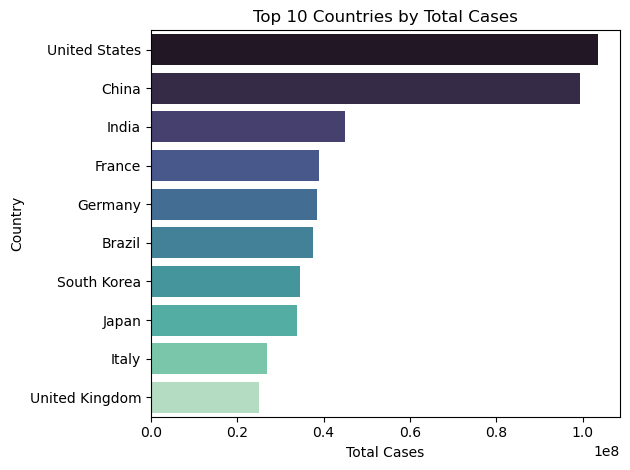

In [7]:
#5.Top 10 Countries by Total Cases
#Get the latest data from the countries
latest_data = df.sort_values('date').groupby('location').last()
#Top 10 Countries
top_cases = latest_data.sort_values('total_cases', ascending=False).head(10)
sns.barplot(x=top_cases['total_cases'], y=top_cases.index, palette='mako')
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

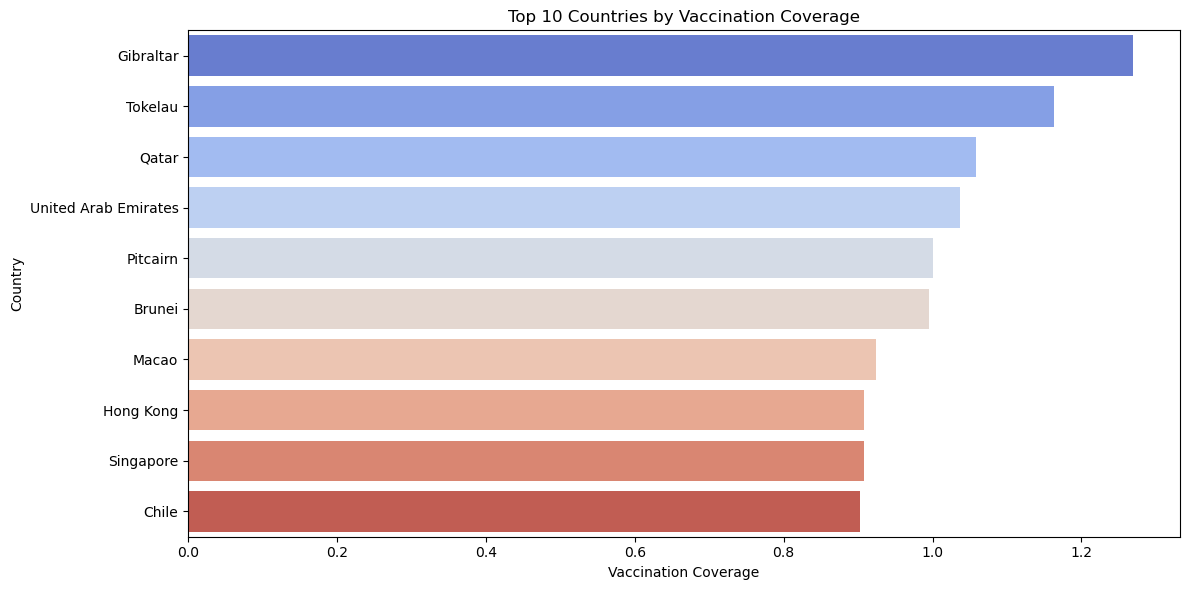

In [12]:
#6.Vaccination Coverage
#Calculate the Vaccination Coverage
latest_data['vaccination_coverage'] = latest_data['people_fully_vaccinated'] / latest_data['population']
#Top 10 Countries
top_vax = latest_data.sort_values('vaccination_coverage', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_vax['vaccination_coverage'], y=top_vax.index, palette='coolwarm')
plt.title('Top 10 Countries by Vaccination Coverage')
plt.xlabel('Vaccination Coverage')
plt.ylabel('Country')
plt.tight_layout()
plt.show()